# Example Datasets

Here, we implemented neural network model for a classifiaction task and a regression task. The datasets we used are [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (classification) and [boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) (regression) from sklearn.

We use NeuralNet class from nnet.py which is basically a gathered version of what we have done in the [learning_internal_representation notebook](./learning_internal_representations.ipynb)

For further information about datasets, see [Breast Cancer Dataset Info](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and [Boston Info](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

In [1]:
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.preprocessing import StandardScaler

from nnet import NeuralNet

In [2]:
# Setting Data Frame Options                      
pd.set_option('display.max_rows', 40)                      
pd.set_option('display.max_columns', 50)                      
pd.set_option('display.width', 100)                      
pd.set_option('display.max_colwidth', 100)                      

# Setting Plot Configuration                      
sns.set(rc={'figure.figsize':(17,11)}, style = 'white')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Breast Cancer Classification

Here, the goal is to make a diagnose prediction with the input data of 30 features as malignant or bening. The dataset contains 569 observations. You can see some summary stats of the input data.

We will use a simple feed-forward neural network that we constructed, and employ the following architecture.

<img src="assets/breast_cancer_architecture.png" width="550" title="Breast Cancer Model Architecture">
<center>Figure 2: <em>Breast Cancer Model Architecture</em></center>

Here *Dense* represents a fully connected layer. We use error function as activation for both of the hidden layers and sigmoid for the output layer.

In [3]:
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
y = y.reshape(len(y), 1)

pd.DataFrame(X).describe()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
layers_ = [40, 20, 1]
activations_ = ['erf', 'erf', 'sigmoid']
loss_ = 'mse'
learning_rate_ = 0.01
epochs_ = 2000

model = NeuralNet(layers=layers_, activations=activations_)

model.fit(X, y, epochs=epochs_, learning_rate=learning_rate_, loss=loss_)

y_pred = model.predict(X, return_classes=True)

print("="*60)
print("Confusion Matrix")
print(classification_report(y, y_pred))

Epoch 0 	 Cost: 0.3240132686033522
Epoch 263 	 Cost: 0.10752832715849835
Epoch 526 	 Cost: 0.08695501588518526
Epoch 789 	 Cost: 0.059832296065470726
Epoch 1052 	 Cost: 0.04022207687499336
Epoch 1315 	 Cost: 0.03351262940653823
Epoch 1578 	 Cost: 0.0312725020972995
Epoch 1841 	 Cost: 0.03031225517028812
Confusion Matrix
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       212
           1       0.91      0.97      0.94       357

    accuracy                           0.92       569
   macro avg       0.92      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



**Learning Curve**

Let's plot the learning curve to see how model is done against the total cost.

<IPython.core.display.Javascript object>

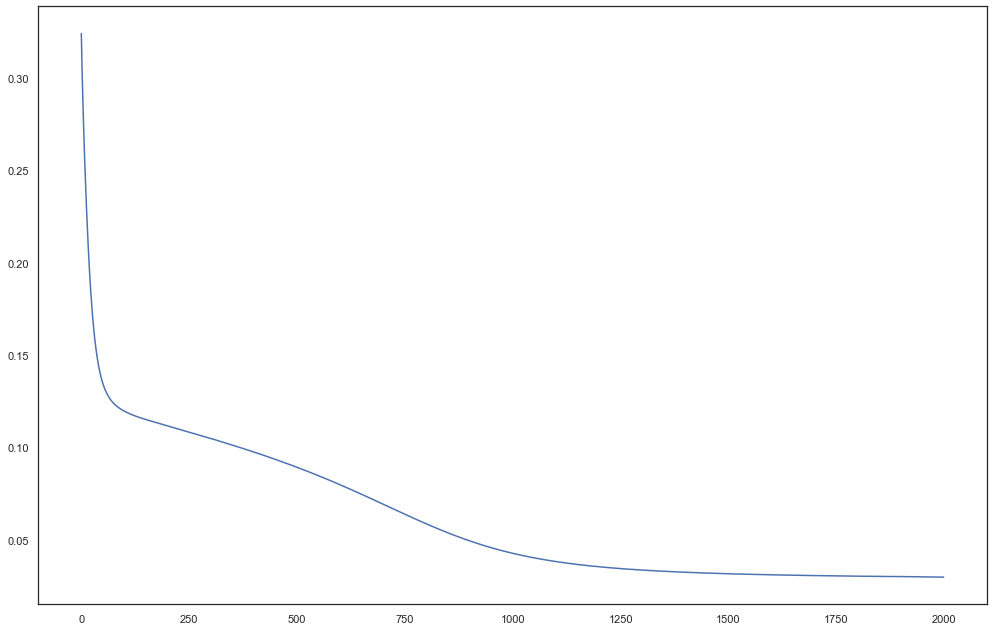

In [5]:
costs = model.history['costs']
learning_curve_1 = sns.lineplot(x=np.arange(len(costs)), y=costs)

## Boston House Price Prediction

Here, the goal is to make a diagnose prediction with the input data of 30 features as malignant or bening. The data contains 506 observations. You can see some summary stats of the input data.

<img src="assets/boston_architecture.png" width="550" title="Boston House Pricing Model Architecture">
<center>Figure 2: <em>Boston House Pricing Model Architecture</em></center>

For better performance, we scale the input data with a [standardization](https://en.wikipedia.org/wiki/Standard_score), and apply a log scale on the target variable.

In [6]:
dataset = load_boston()
X, y = dataset['data'], dataset['target']
y = y.reshape(len(y), 1)

pd.DataFrame(X).describe()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<IPython.core.display.Javascript object>

Epoch 0 	 Cost: 4.687385063060225
Epoch 80 	 Cost: 0.08323899414589445
Epoch 160 	 Cost: 0.08277928176319886
Epoch 240 	 Cost: 0.08118668576900642
Epoch 320 	 Cost: 0.06992140064064498
Epoch 400 	 Cost: 0.0315594231476113
Epoch 480 	 Cost: 0.023793667932819753
MSE:  0.0452 	 RMSE:  0.2125


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

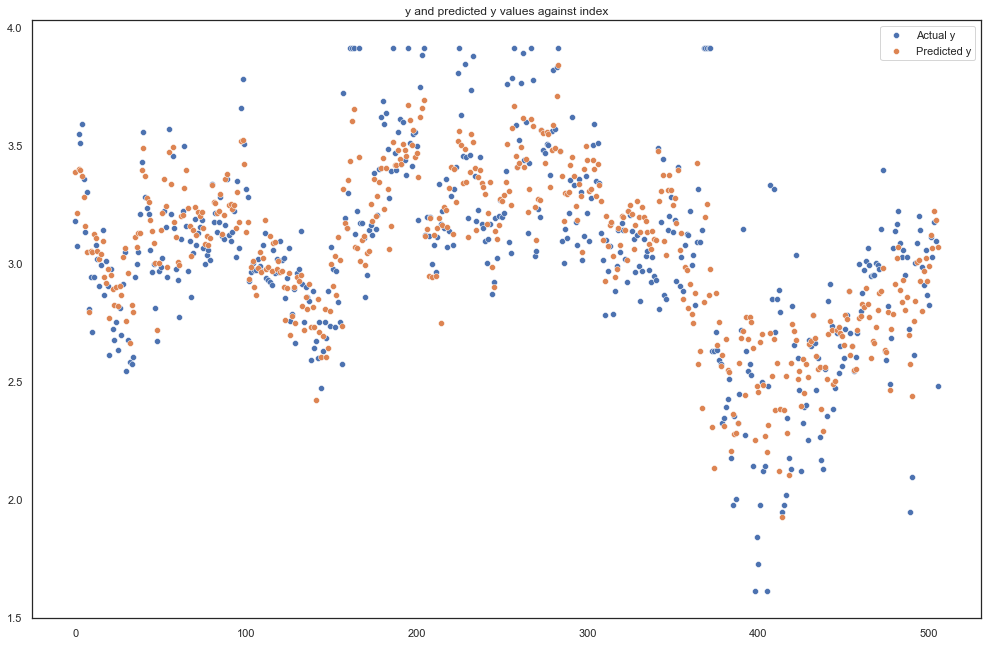

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.log(y)

layers_ = [30, 15, 1]
activations_ = ['arctan', 'relu', 'linear']
loss_ = 'mse'
learning_rate_ = 0.1
epochs_ = 500

model = NeuralNet(layers=layers_, activations=activations_)

model.fit(X, y, epochs=epochs_, learning_rate=learning_rate_, loss=loss_)

y_pred = model.predict(X, return_classes=False)

mse = mean_squared_error(y, y_pred)
print("="*60)
print(f'MSE: {mse: .4f} \t RMSE: {mse**.5: .4f}')

sns.scatterplot(x=np.arange(X.shape[0]), y=y.ravel())
fig = sns.scatterplot(x=np.arange(X.shape[0]), y=y_pred.ravel())
fig.set(title='y and predicted y values against index')
plt.legend(['Actual y', 'Predicted y'])
None

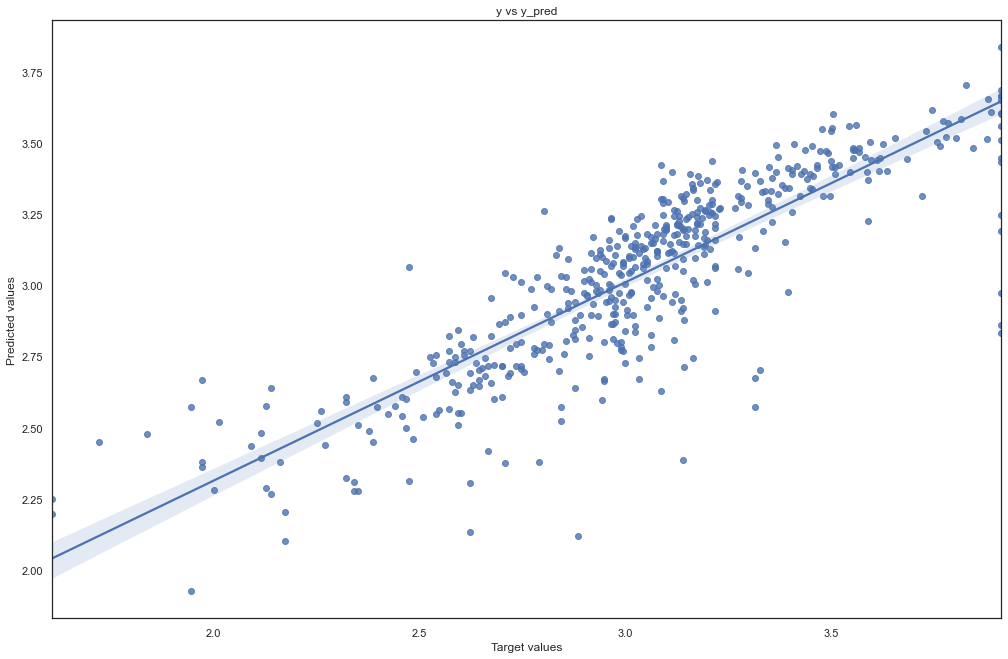

In [8]:
fig = sns.regplot(x=y, y=y_pred)
fig.set(xlabel='Target values', ylabel='Predicted values', title='y vs y_pred')
None

**Learning Curve**

Let's plot the learning curve to see how model is done against the total cost.

<IPython.core.display.Javascript object>

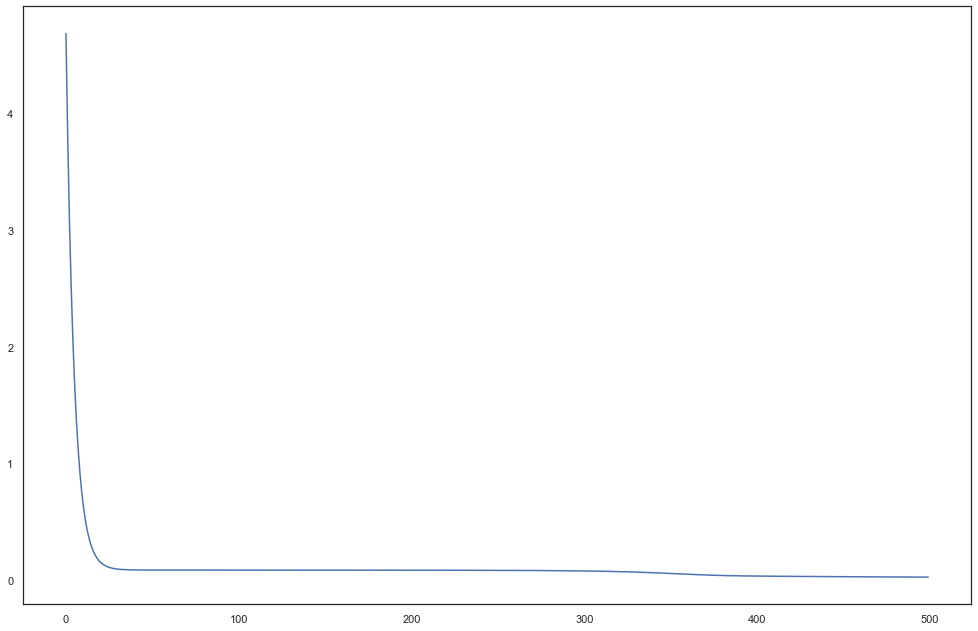

In [9]:
costs = model.history['costs']
fig = sns.lineplot(x=np.arange(len(costs)), y=costs)